In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
%matplotlib inline

# 温度変化計測

In [3]:
temp = pd.read_csv('/mnt/recordings/ExperimentData/20180426-2/temperature/scene9/dat00001.csv')

In [4]:
x = temp['Sweep #']
y1 = temp['Chan 101 (C)']
y2 = temp['Chan 104 (C)']
y3 = temp['Chan 107 (C)']

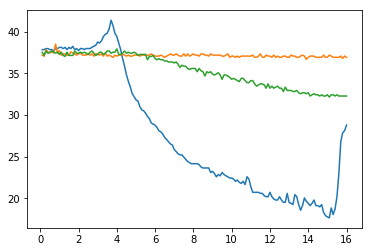

In [5]:
plt.plot(x*100/1000, y1)
plt.plot(x*100/1000, y2)
plt.plot(x*100/1000, y3)
plt.show()

In [72]:
plt.plot(x*100/1000, y1, linewidth=2.5)
plt.xlim([0,15])
plt.xticks(size=16)
plt.yticks(size=16)
plt.savefig('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/scene9_channel1.png', dpi=600)
plt.close()

In [19]:
plt.plot(x*100/1000, y3, label='point A', linewidth=2.5, c= 'b')
plt.plot(x*100/1000, y2, label='point B', linewidth=2.5, c='#ff7f2aff')
plt.xlim([0,15])
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.savefig('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/scene9_channel2_3.png', dpi=600)
plt.close()

In [7]:
plt.plot(x*100/1000, y3, label='point A', linewidth=2.5, c= 'b')
plt.plot(x*100/1000, y1, label='point C', linewidth=2.5, c='#ff7f2aff')
plt.xlim([0,15])
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.savefig('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/scene9_channel1_3.png', dpi=600)
plt.close()

# pinningの結果

In [74]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

In [138]:
file_names = ['C001H001S0013', 'C001H001S0014', 'C001H001S0015']
for file_name in file_names:
    raw = RawCam(path='/mnt/recordings/ExperimentData/20180426-2/%s/'%file_name, cam_type='sa4', image_width=512, image_height=512, frame_start=0, frame_end=-1)
    vmem = VmemMap(raw)
    vmem.setDiffRange(diff_min=40)
    vmem.setRectROI(bottom=470)
    vmem.saveImage(savedir='/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/%s/vmem' % file_name, img_type='png', skip=1)
    cmd = 'ffmpeg -r 30 -y -i "{0}/vmem/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/vmem_movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/%s/' % file_name)
    subprocess.call(cmd, shell=True)

In [140]:
file_names = ['C001H001S0013', 'C001H001S0014', 'C001H001S0015']
for file_name in file_names:
    raw = RawCam(path='/mnt/recordings/ExperimentData/20180426-2/%s/'%file_name, cam_type='sa4', image_width=512, image_height=512, frame_start=0, frame_end=-1)
    vmem = VmemMap(raw)
    vmem.setDiffRange(diff_min=40)
    vmem.setRectROI(bottom=470)
    pmap = PhaseMap(vmem, shrink=4)
    pmap.saveImage(savedir='/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/%s/pmap' % file_name, img_type='png', skip=1)
    cmd = 'ffmpeg -r 30 -y -i "{0}/pmap/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/pmap_movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/%s/' % file_name)
    subprocess.call(cmd, shell=True)

In [141]:
 file_names = ['C001H001S0013', 'C001H001S0014', 'C001H001S0015']
for file_name in file_names:
    cmd = 'ffmpeg -r 30 -y -i "{0}/pmap/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/pmap_movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/%s/' % file_name)
    subprocess.call(cmd, shell=True)

In [164]:
raw = RawCam(path='/mnt/recordings/ExperimentData/20180426-2/C001H001S0014/', cam_type='sa4', image_width=512, image_height=512, frame_start=0, frame_end=1000)

In [184]:
vmem = VmemMap(raw)
vmem.setDiffRange(diff_min=40)
vmem.setRectROI(bottom=470)
vmem.smooth(size=1)

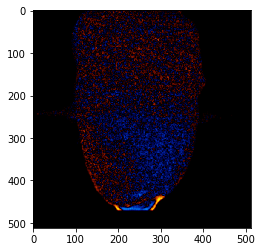

In [185]:
vmem.showFrame(200)

In [192]:
vmem.saveImage('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/C001H001S0014/vmem', img_type='png', skip=1)

In [193]:
cmd = 'ffmpeg -r 30 -y -i "{0}/vmem/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/vmem_movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/C001H001S0014/')
subprocess.call(cmd, shell=True)

0

In [194]:
pmap = PhaseMap(vmem, shrink=4)
pmap.smooth(size=5)

In [190]:
pmap.saveImage('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/C001H001S0014/pmap', img_type='png', skip=1)

In [191]:
cmd = 'ffmpeg -r 30 -y -i "{0}/pmap/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/pmap_movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/C001H001S0014/')
subprocess.call(cmd, shell=True)

0

## 温度分布シミュレーション

In [ ]:
alpha = 0.0000001466 #水の熱拡散係数
rho_c = 4200000
cell_height = 0.00015
h = 290 #W/(m^2 K)
dt = 0.001
dx = 0.0001

small_mat = np.identity(200)*(-4)+np.tri(200,200,-1)-np.tri(200,200,-2)-np.tri(200,200,0)+np.tri(200,200,1)
def_mat = np.zeros((200*200, 200*200))
for i in range(200):
    for j in range(200):
        if i == j:
            def_mat[200*i:200*(i+1), 200*j:200*(j+1)] = small_mat
        if i-j == 1 or i-j == -1:
            def_mat[200*i:200*(i+1), 200*j:200*(j+1)] = np.identity(200)

In [ ]:
cooling_temp = 20
time = 15000
temp_array = np.ones((200, 200)) * 310
temp_array[5:15, 85:115] = 273+cooling_temp
temp_array = temp_array.flatten()
np.save('/mnt/recordings/AnalysisResult/Seno/simulation/temp/cooling_20/temp_0000.npy', temp_array)

for i in range(time):
    if i % 1000 == 0:
        print(i)
    temp_array = temp_array + alpha*dt/dx/dx*np.dot(def_mat, temp_array)
    temp_array = temp_array.reshape((200, 200))
    temp_array[0, :] = 310
    temp_array[5:15, 85:115] = 273+cooling_temp
    temp_array[-1,:] = 310
    temp_array[:,0] = 310
    temp_array[:, -1] = 310
    temp_array = temp_array.flatten()
    np.save('/mnt/recordings/AnalysisResult/Seno/simulation/temp/cooling_20/temp_%s.npy' % "{0:04d}".format(i+1), temp_array)

0
1000


In [32]:
temp = np.zeros((10, 200, 200))
for i in range(10):
#     temp[i] = np.load('/mnt/recordings/AnalysisResult/Seno/simulation/temp/cooling_20/temp_%s.npy' % "{0:04d}".format(i)).reshape((200, 200))
    temp[i] = np.load('/mnt/recordings/SimulationResults/2D/20180411-6/cell_%s/temp.npy' % "{0:04d}".format(i)).reshape((200, 200))

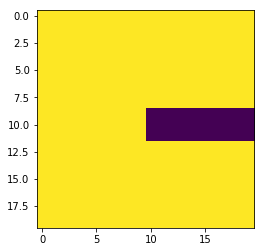

In [33]:
plt.imshow(temp[1, 90:110, 90:110])
plt.show()